# Importing libraries

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pprint import pprint

from sklearn import model_selection
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler # Preprocessing

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

from collections import OrderedDict
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import  train_test_split
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import r2_score
from scipy import stats
from sklearn.preprocessing import StandardScaler


%matplotlib inline
import warnings
warnings.filterwarnings('ignore')



# Reading Dataset

In [2]:
df = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

Id = test["Id"]

X_test = test.drop(["Id"], axis=1)


# Having a look at Data and its structure 

In [3]:
df.shape, df.size

((450, 13), 5850)

In [4]:
df.head(3)

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0


In [5]:
df.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000
mean,4.637778,4.306667,90.711556,112.545333,548.043556,9.131111,19.018889,44.580000,4.053778,0.024889,10.145489
std,2.337816,1.233966,5.494715,66.095553,249.387800,4.646632,5.860120,16.254081,1.750621,0.317146,43.300743
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.900000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.875000,438.500000,6.500000,15.700000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.150000,658.200000,8.400000,19.400000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,92.900000,142.400000,715.100000,10.950000,22.875000,54.000000,4.900000,0.000000,6.345000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,746.280000


huge difference between max values of features!

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 13 columns):
X        450 non-null int64
Y        450 non-null int64
month    450 non-null object
day      450 non-null object
FFMC     450 non-null float64
DMC      450 non-null float64
DC       450 non-null float64
ISI      450 non-null float64
temp     450 non-null float64
RH       450 non-null int64
wind     450 non-null float64
rain     450 non-null float64
area     450 non-null float64
dtypes: float64(8), int64(3), object(2)
memory usage: 45.8+ KB


In [7]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 12 columns):
X        67 non-null int64
Y        67 non-null int64
month    67 non-null object
day      67 non-null object
FFMC     67 non-null float64
DMC      67 non-null float64
DC       67 non-null float64
ISI      67 non-null float64
temp     67 non-null float64
RH       67 non-null int64
wind     67 non-null float64
rain     67 non-null int64
dtypes: float64(6), int64(4), object(2)
memory usage: 6.4+ KB


In [8]:
df.columns

Index(['X', 'Y', 'month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH',
       'wind', 'rain', 'area'],
      dtype='object')

#### Checking categorical data and numeric Data

In [9]:
categorical_features = df.select_dtypes(include=[np.object])
print("Categorical_features  : ",categorical_features.columns.size)
print("Categorical_features : ",categorical_features.columns)



numeric_features = df.select_dtypes(include=[np.number])
print("Numeric_features : ",numeric_features.columns.size)
print("Numeric_features : ",numeric_features.columns)

Categorical_features  :  2
Categorical_features :  Index(['month', 'day'], dtype='object')
Numeric_features :  11
Numeric_features :  Index(['X', 'Y', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain',
       'area'],
      dtype='object')


In [10]:
print("X_test shape : ", X_test.shape)
print("X_test columns : ", X_test.columns)

X_test shape :  (67, 12)
X_test columns :  Index(['X', 'Y', 'month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH',
       'wind', 'rain'],
      dtype='object')


In [11]:
X_test.head(3)

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain
0,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0
1,8,6,aug,mon,91.5,145.4,608.2,10.7,8.0,86,2.2,0
2,8,6,sep,tue,91.0,129.5,692.6,7.0,13.1,63,5.4,0


# Checking for NAs

In [12]:
#missing data in Training set
pd.set_option('precision', 6)
null_values_per_col =  df.isnull().sum().sort_values(ascending = False)
percent = ( df.isnull().sum()/df.isnull().count()).sort_values(ascending = False)
missing_data = pd.concat([null_values_per_col, percent.astype(float)], axis = 1, keys =["Total", "Percent"])
print(missing_data.head(20)) 

       Total  Percent
area       0      0.0
rain       0      0.0
wind       0      0.0
RH         0      0.0
temp       0      0.0
ISI        0      0.0
DC         0      0.0
DMC        0      0.0
FFMC       0      0.0
day        0      0.0
month      0      0.0
Y          0      0.0
X          0      0.0


In [13]:
#missing data in Testing set
pd.set_option('precision', 6)
null_values_per_col =  X_test.isnull().sum().sort_values(ascending = False)
percent = ( X_test.isnull().sum()/X_test.isnull().count()).sort_values(ascending = False)
missing_data = pd.concat([null_values_per_col, percent.astype(float)], axis = 1, keys =["Total", "Percent"])
print(missing_data.head(20)) 

       Total  Percent
rain       0      0.0
wind       0      0.0
RH         0      0.0
temp       0      0.0
ISI        0      0.0
DC         0      0.0
DMC        0      0.0
FFMC       0      0.0
day        0      0.0
month      0      0.0
Y          0      0.0
X          0      0.0


# Checking out  `AREA`

In [14]:
df["area"].describe()

count    450.000000
mean      10.145489
std       43.300743
min        0.000000
25%        0.000000
50%        0.520000
75%        6.345000
max      746.280000
Name: area, dtype: float64

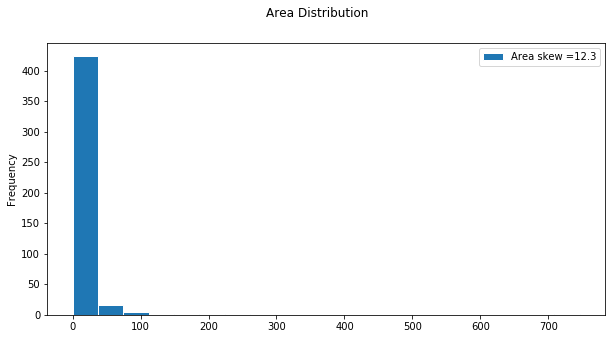

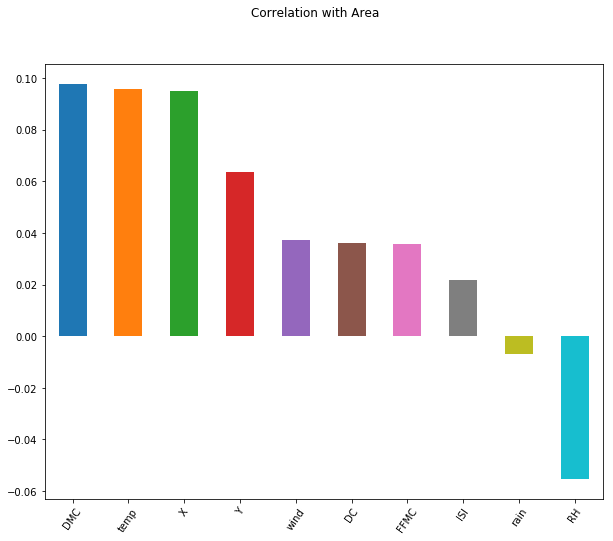

DMC     0.097792
temp    0.095625
X       0.094968
Y       0.063797
wind    0.037269
DC      0.036280
FFMC    0.035850
ISI     0.021936
rain   -0.006705
RH     -0.055384
Name: area, dtype: float64


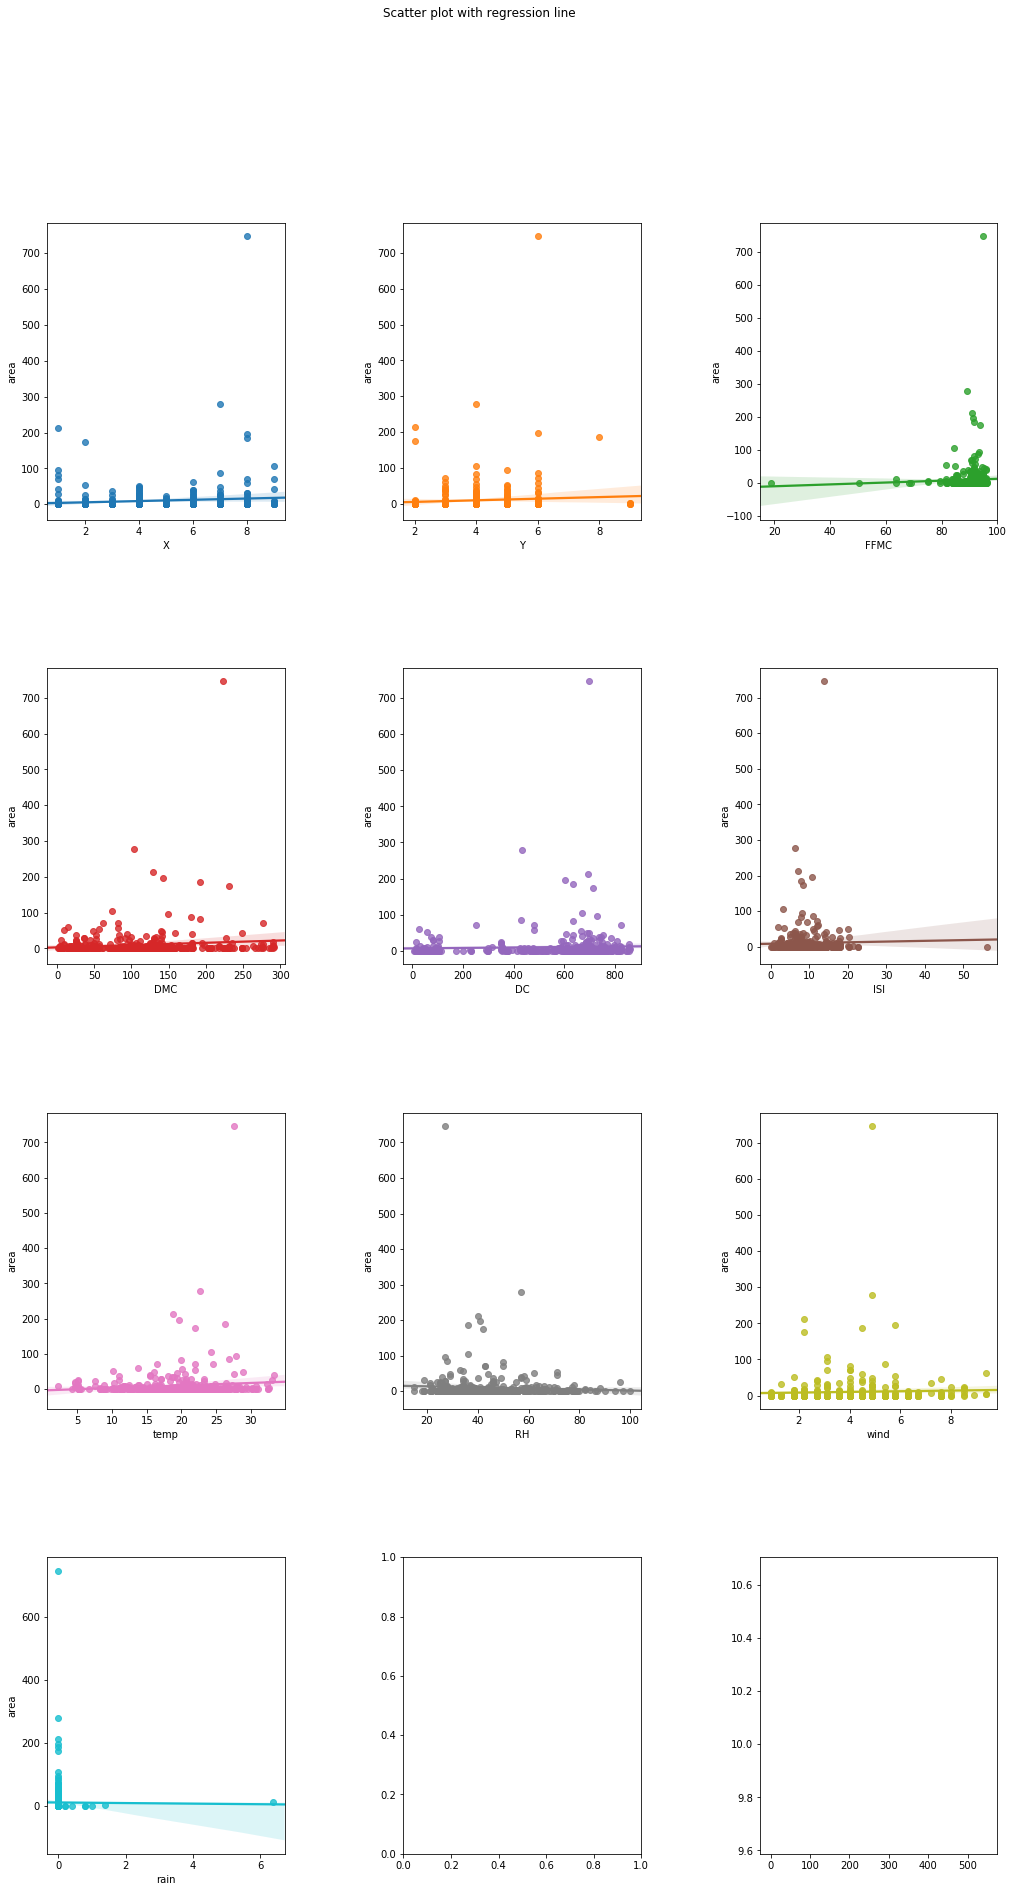

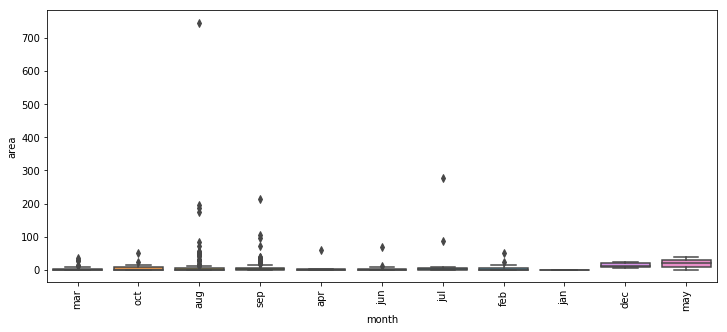

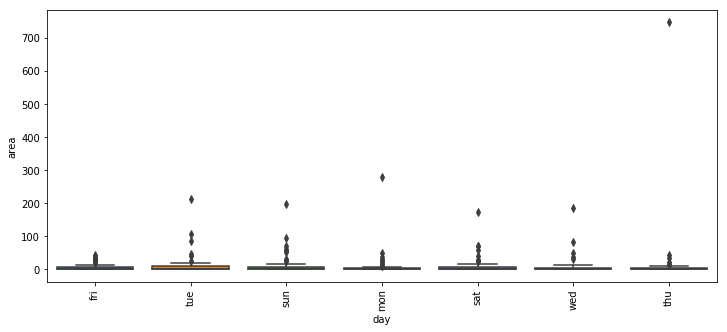

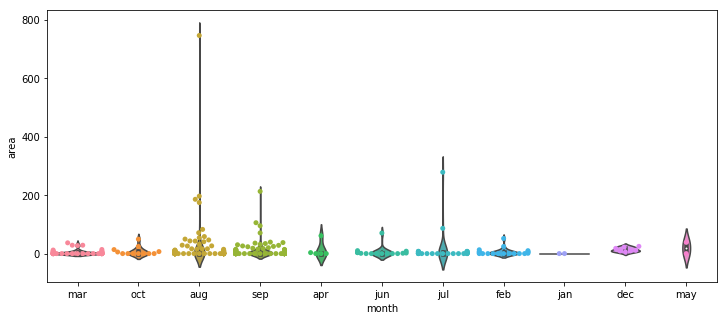

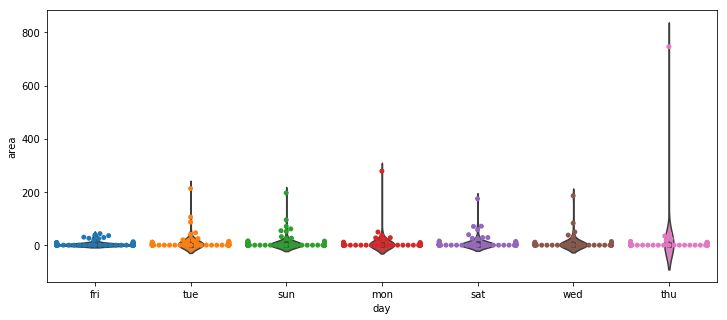

In [15]:
#distribution of area
skewness = df["area"].skew()
plt.figure(figsize = (10,5))
df["area"].plot.hist(edgecolor = 'white',bins = 20, label = 'Area skew ='+ str(round(skewness,2)))
plt.suptitle("Area Distribution")
plt.legend()
plt.show()



#correlation with Area
plt.figure(figsize = (10,8))
corr_with_area = df.corr()["area"].sort_values(ascending = False)
corr_with_area.drop(["area"]).plot.bar()
plt.xticks(rotation =55)
plt.suptitle('Correlation with Area')
plt.show()
print(corr_with_area.drop(["area"]).head(10))




#Regression plot with individual numeric_feature
fig, axs = plt.subplots(4,3, figsize=(16, 30), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .5, wspace=.5, right=0.95)

axs = axs.ravel()

for ind, col in enumerate(numeric_features.drop([ "area"], axis = 1).columns):
        sns.regplot(numeric_features[col],df['area'], fit_reg = True, ax = axs[ind])
plt.suptitle('Scatter plot with regression line')
plt.show()

#Distribution with  categorical data
for col in categorical_features:
        plt.figure(figsize = (12,5))
        plt.xticks(rotation = 90)
        sns.boxplot(df[col],df['area'])
        plt.show()

#November is missing!

for col in categorical_features:
        plt.figure(figsize = (12,5))
        sns.violinplot(categorical_features[col], df['area'])
        sns.swarmplot(categorical_features[col], df['area'])
        plt.show()


## Univariate Analysis

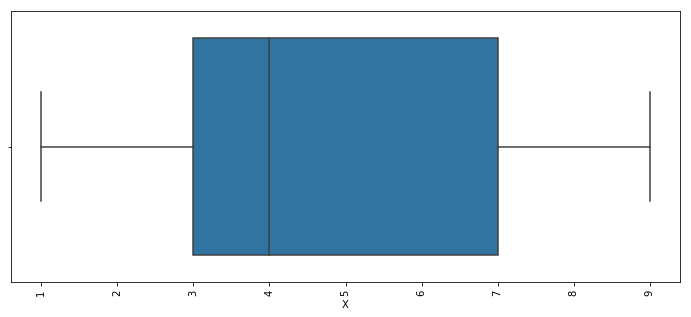

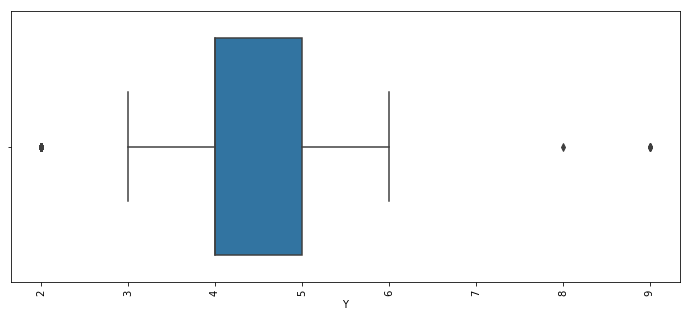

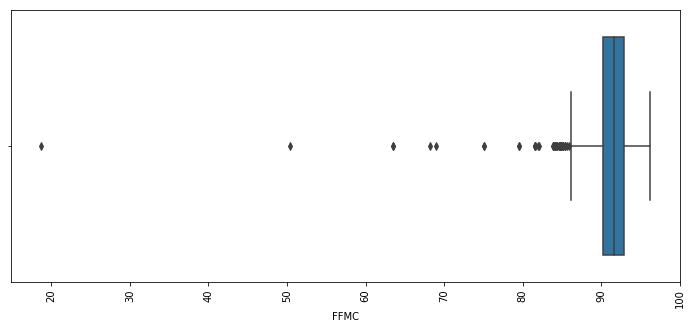

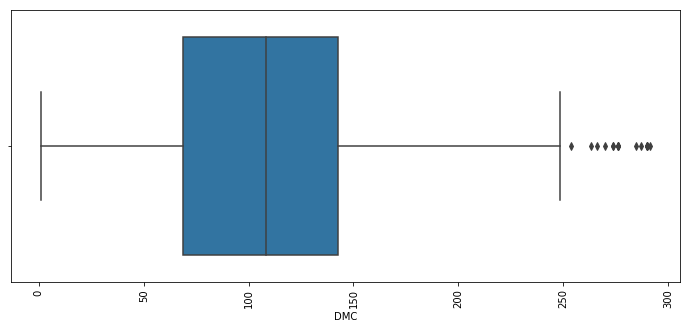

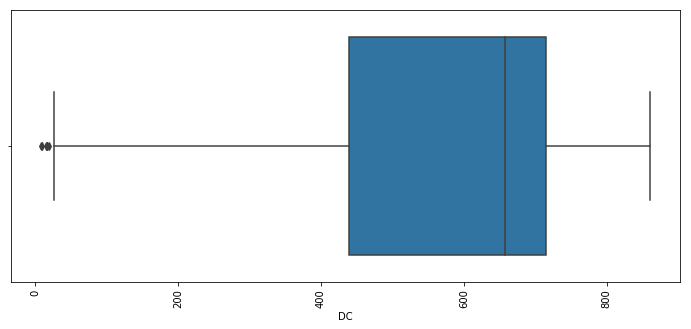

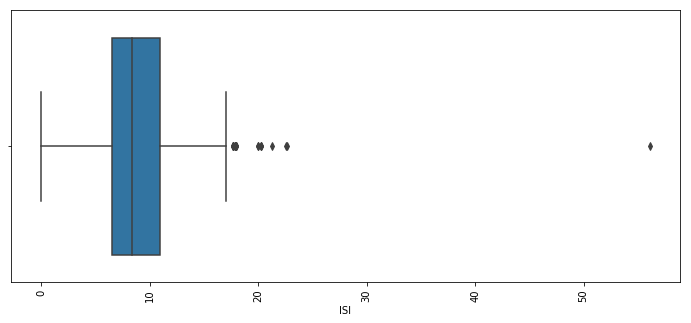

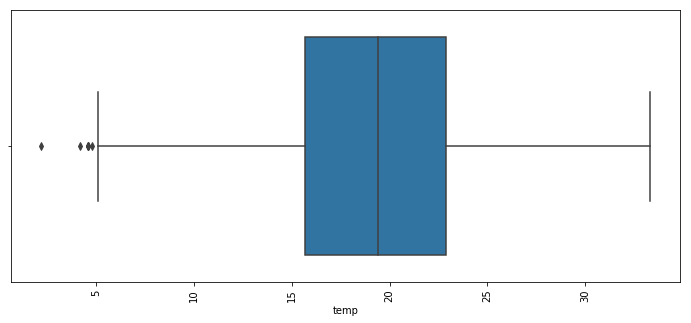

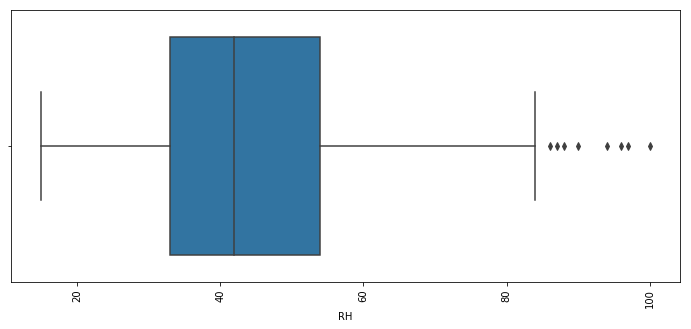

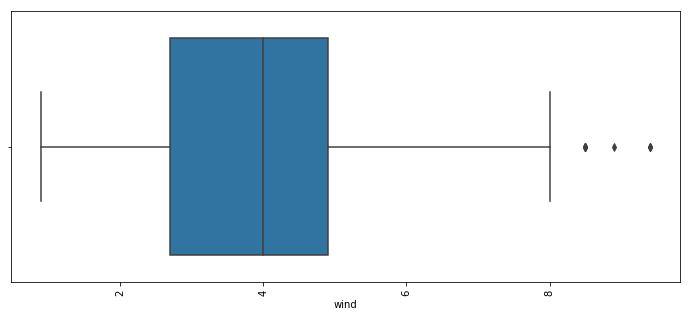

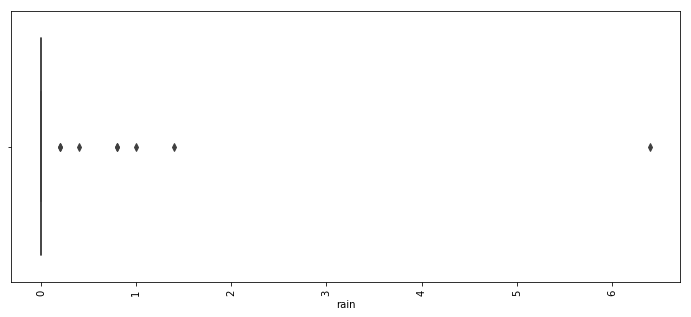

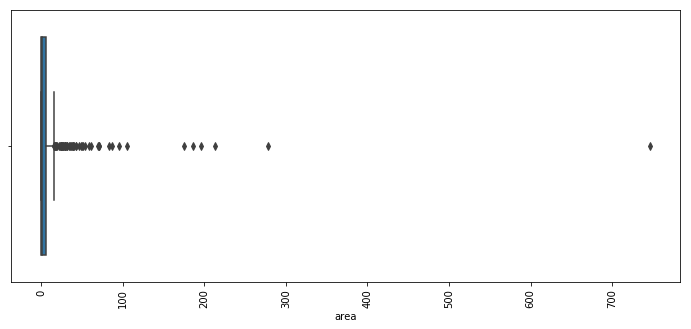

In [16]:
#Distribution with  numeric data
for col in numeric_features:
        plt.figure(figsize = (12,5))
        plt.xticks(rotation = 90)
        sns.boxplot(x=df[col])        
        plt.show()

rain    18.487393
area    12.302959
ISI      2.706510
RH       0.809478
DMC      0.564951
wind     0.563240
Y        0.400096
X        0.062860
temp    -0.316478
DC      -1.089400
FFMC    -6.956056
dtype: float64


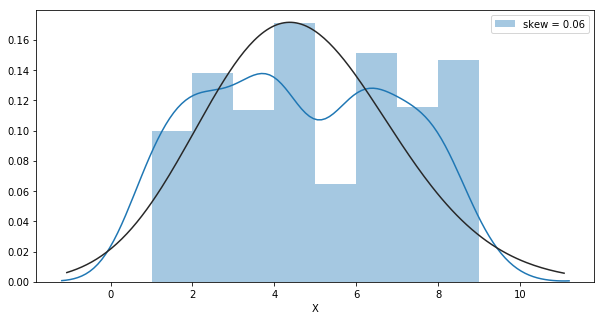

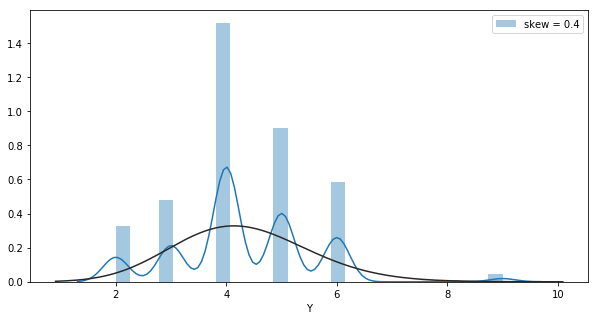

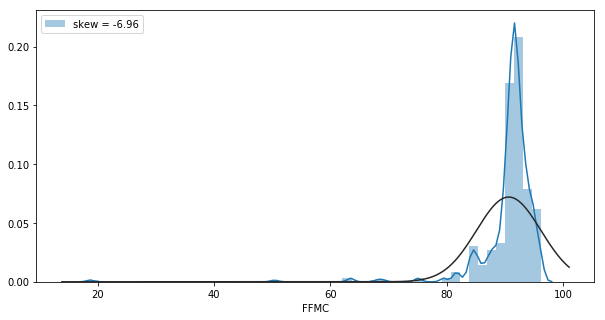

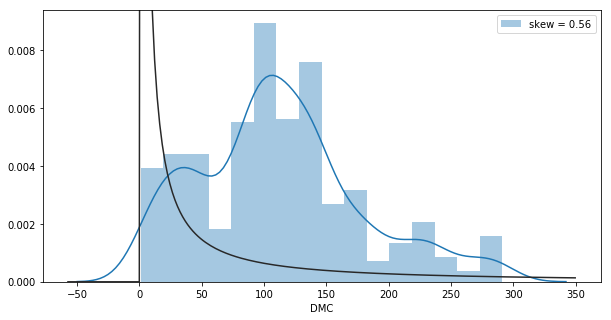

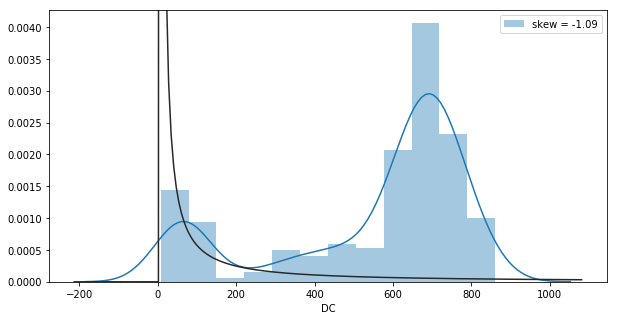

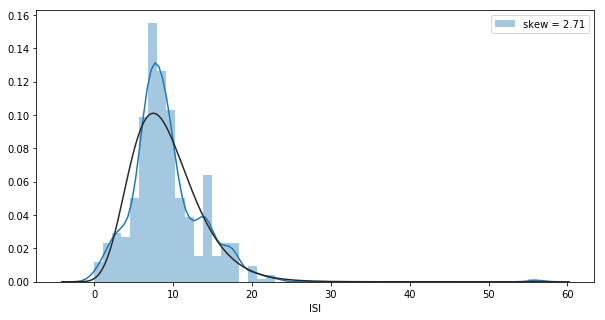

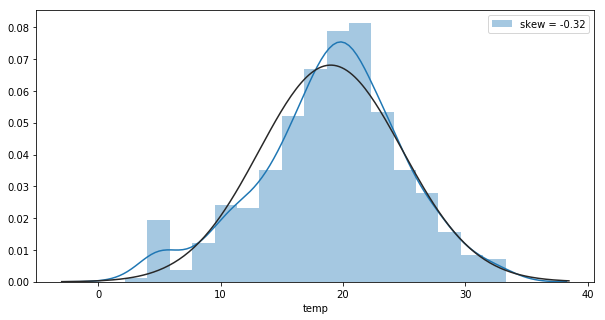

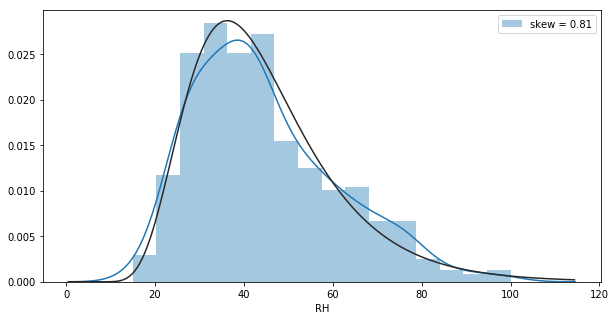

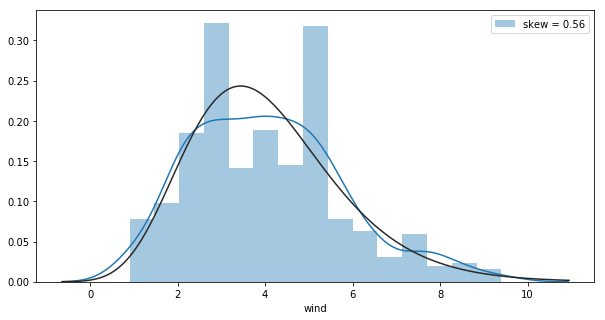

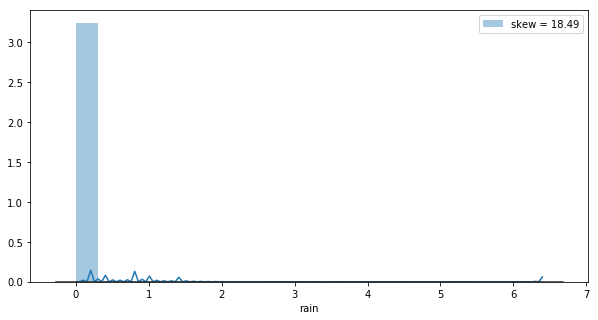

In [17]:
# distribution of Numeric Data
skews = numeric_features.skew()
print(skews.sort_values(ascending = False))

for col in numeric_features.drop(["area"], axis=1).columns.tolist():
        plt.figure(figsize = (10,5))
        sns.distplot(df[col],fit = stats.lognorm,label="skew = " + str(round(skews[col],2)) )
        plt.legend()
        plt.show()

log transformation required for +vely skwed features

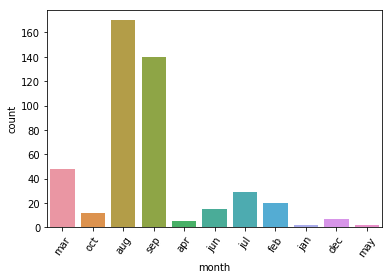

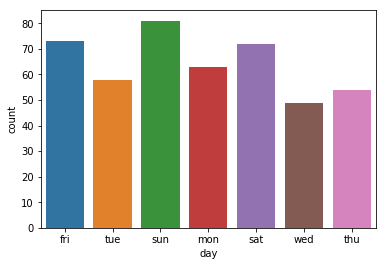

In [18]:
#Distribution of categorical data
plt.xticks(rotation = 55)
for col in categorical_features:
        sns.countplot(col, data = df)
        plt.show()



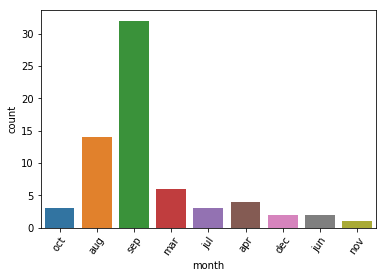

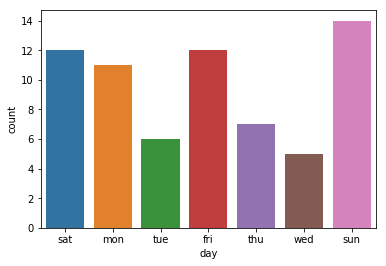

In [19]:
#Distribution of categorical data in Test set
plt.xticks(rotation = 55)
for col in categorical_features:
        sns.countplot(col, data = test)
        plt.show()

# Bivariate Analysis

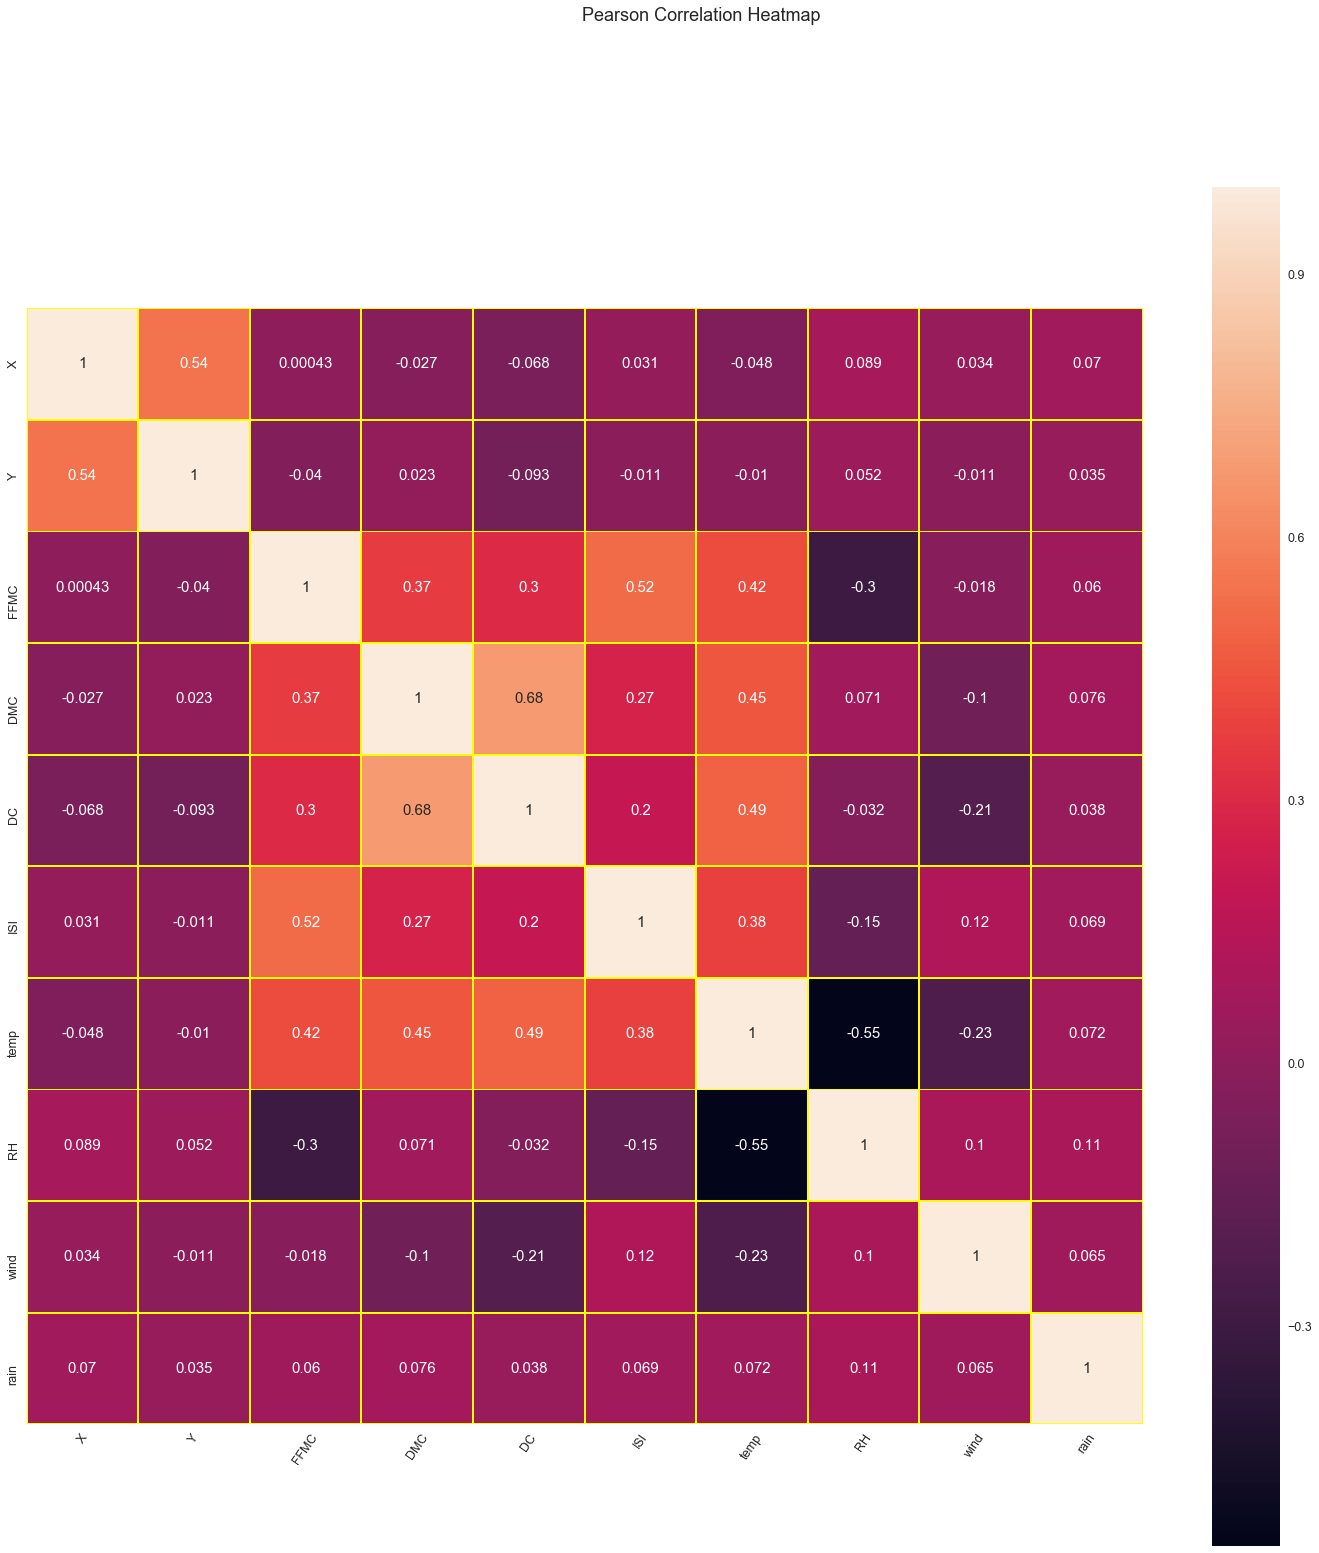

In [20]:
#Correlation matrix
plt.figure(figsize = (25,25))
sns.set(font_scale=1.25)
pd.set_option('precision', 2)
corrmat = df.drop(["area"], axis = 1).corr()
sns.heatmap(corrmat, annot=True,  linewidths=1, linecolor='yellow',square = True)
plt.suptitle("Pearson Correlation Heatmap")
plt.xticks(rotation = 55)
plt.show()

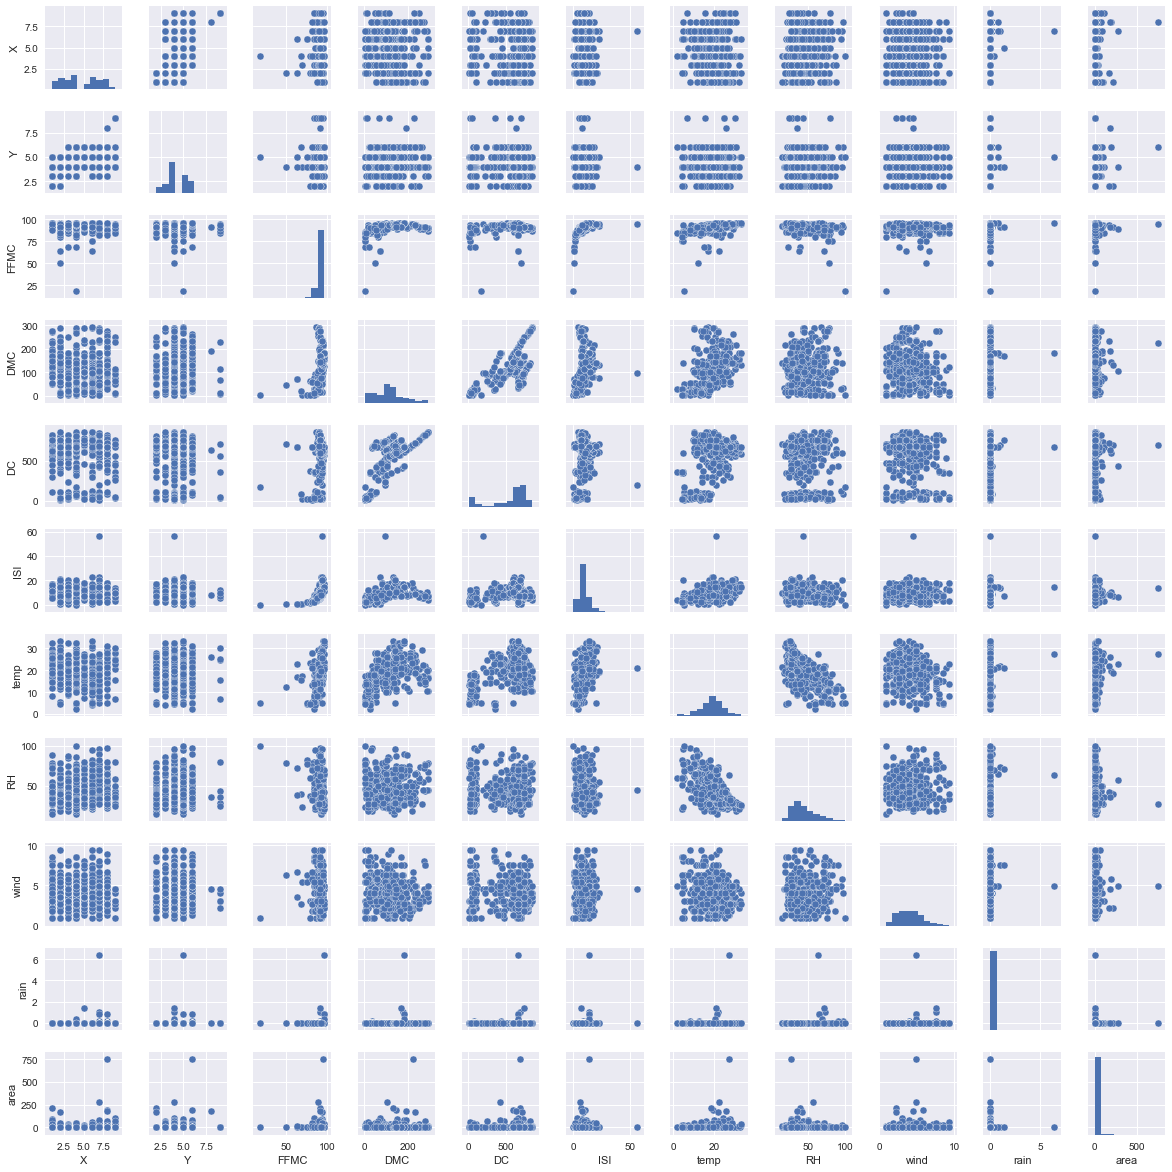

In [21]:
#scatterplot 
sns.set()
sns.pairplot(df, size = 1.5)
plt.show();

# Handeling Categorical features

In [22]:
X, y = df.drop(['area'], axis = 1), df['area']

print("X shape : ",X.shape, "\nX_test shape :",X_test.shape)
print("\nX :")
print(X.head(3))
print("\n\n\nX_test :")
print(X_test.head(3))

X shape :  (450, 12) 
X_test shape : (67, 12)

X :
   X  Y month  day  FFMC   DMC     DC  ISI  temp  RH  wind  rain
0  7  5   mar  fri  86.2  26.2   94.3  5.1   8.2  51   6.7   0.0
1  7  4   oct  tue  90.6  35.4  669.1  6.7  18.0  33   0.9   0.0
2  8  6   mar  fri  91.7  33.3   77.5  9.0   8.3  97   4.0   0.2



X_test :
   X  Y month  day  FFMC    DMC     DC   ISI  temp  RH  wind  rain
0  7  4   oct  sat  90.6   43.7  686.9   6.7  14.6  33   1.3     0
1  8  6   aug  mon  91.5  145.4  608.2  10.7   8.0  86   2.2     0
2  8  6   sep  tue  91.0  129.5  692.6   7.0  13.1  63   5.4     0


## Combining Test And Train set

In [23]:
Dataset_X = pd.concat([X, X_test])
print(Dataset_X.shape)

(517, 12)


# One Hot Encoding `day` and `month`

In [24]:
#One Hot Encoding Day feature
day_dummies = pd.get_dummies(Dataset_X['day'], drop_first=True)
Dataset_X = pd.concat([Dataset_X, day_dummies], axis=1)
Dataset_X.drop(['day'], axis=1, inplace=True)
print(Dataset_X.shape)
print(Dataset_X.head(3))


#One Hot Encoding month feature
month_dummies = pd.get_dummies(Dataset_X['month'], drop_first=True)
Dataset_X = pd.concat([Dataset_X, month_dummies], axis=1)
Dataset_X.drop(['month'], axis=1, inplace=True)

print(Dataset_X.shape)
print(Dataset_X.head(3))

(517, 17)
   X  Y month  FFMC   DMC     DC  ISI  temp  RH  wind  rain  mon  sat  sun  \
0  7  5   mar  86.2  26.2   94.3  5.1   8.2  51   6.7   0.0    0    0    0   
1  7  4   oct  90.6  35.4  669.1  6.7  18.0  33   0.9   0.0    0    0    0   
2  8  6   mar  91.7  33.3   77.5  9.0   8.3  97   4.0   0.2    0    0    0   

   thu  tue  wed  
0    0    0    0  
1    0    1    0  
2    0    0    0  
(517, 27)
   X  Y  FFMC   DMC     DC  ISI  temp  RH  wind  rain ...   dec  feb  jan  \
0  7  5  86.2  26.2   94.3  5.1   8.2  51   6.7   0.0 ...     0    0    0   
1  7  4  90.6  35.4  669.1  6.7  18.0  33   0.9   0.0 ...     0    0    0   
2  8  6  91.7  33.3   77.5  9.0   8.3  97   4.0   0.2 ...     0    0    0   

   jul  jun  mar  may  nov  oct  sep  
0    0    0    1    0    0    0    0  
1    0    0    0    0    0    1    0  
2    0    0    1    0    0    0    0  

[3 rows x 27 columns]


# Spliting into Train and Test set

In [25]:
X = Dataset_X.iloc[:450, :]
X_test = Dataset_X.iloc[450:, :]

print("X shape :", X.shape)
print("X_test :", X_test.shape)

X shape : (450, 27)
X_test : (67, 27)


### spliting Train set into Train and Validate set

In [26]:
#Splitting trainset into train and validation set 
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.4, random_state = 9)
print("X_train shape :",X_train.shape,"\ny_train shape :" ,y_train.shape)
print("X_val shape :", X_val.shape,"\n" "y_val.shape :",y_val.shape)

X_train shape : (270, 27) 
y_train shape : (270,)
X_val shape : (180, 27) 
y_val.shape : (180,)


### Modeling

In [56]:
## Linear Regression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred = lin_reg.predict(X_val)


print("Linear Regression")
pprint(lin_reg.get_params())
print("Root Mean Squared Error :",np.sqrt(MSE(y_val, y_pred)))
print("R2_score :\t\t", r2_score(y_val, y_pred))

## Decision Tree Regressor

deci_reg = DecisionTreeRegressor()
deci_reg.fit(X_train, y_train)
y_pred = deci_reg.predict(X_val)

print("\n\nDecision Tree Regressor :")
pprint(deci_reg.get_params())
print("Root Mean Squared Error :",np.sqrt(MSE(y_val, y_pred)))
print("R2_score :\t\t", r2_score(y_val, y_pred))

## Random Forest Regressor


rf_reg = RandomForestRegressor()
rf_reg.fit(X_train, y_train)
y_pred = rf_reg.predict(X_val)

print("\n\nRandom Forest Regressor :")

pprint(rf_reg.get_params())
print("Root Mean Squared Error :",np.sqrt(MSE(y_val, y_pred)))
print("R2_score :\t\t", r2_score(y_val, y_pred))

## SVR

l = [0.01, 0.1, 10, 100, 1000]
print("\n\nSVR :")
for c in l:
    svm_reg = SVR(C=c, kernel = 'rbf')
    svm_reg.fit(X_train, y_train)
    y_pred = svm_reg.predict(X_val)
    print("C = ", c)
    pprint(svm_reg.get_params())
    print("Root Mean Squared Error :",np.sqrt(MSE(y_val, y_pred)))
    print("R2_score :\t\t", r2_score(y_val, y_pred))
    print('\n')

Linear Regression
{'copy_X': True, 'fit_intercept': True, 'n_jobs': 1, 'normalize': False}
Root Mean Squared Error : 6.648978826709135
R2_score :		 -0.44058964107940346


Decision Tree Regressor :
{'criterion': 'mse',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': False,
 'random_state': None,
 'splitter': 'best'}
Root Mean Squared Error : 10.068810872240693
R2_score :		 -2.303594651470728


Random Forest Regressor :
{'bootstrap': True,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 10,
 'n_jobs': 1,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}
Root Mean Squared Error : 7.65790

# Removing Outliers*

In [28]:
df_mod = pd.concat([X, y], axis=1)
print(df_mod.shape)

(450, 28)


(428, 28)


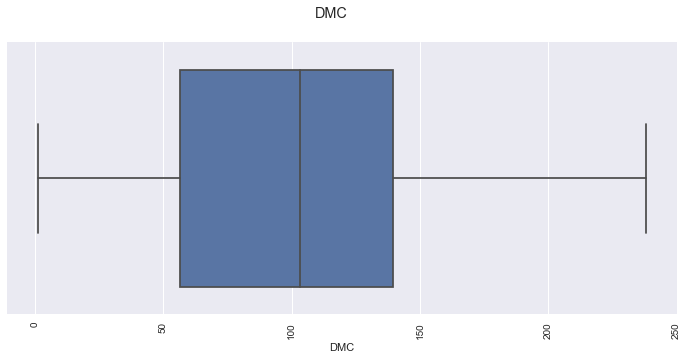

(422, 28)


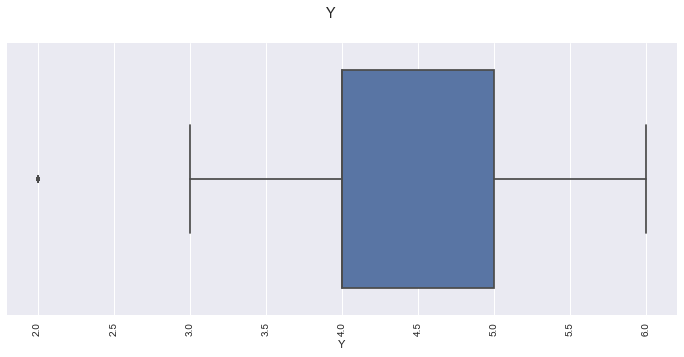

(406, 28)


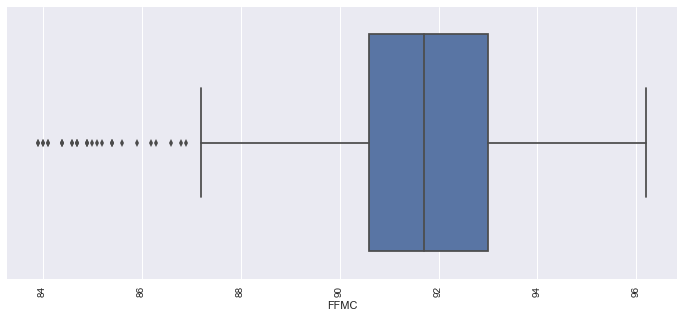

(339, 28)


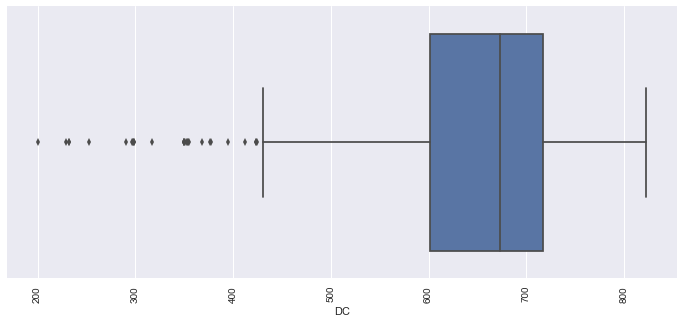

(311, 28)


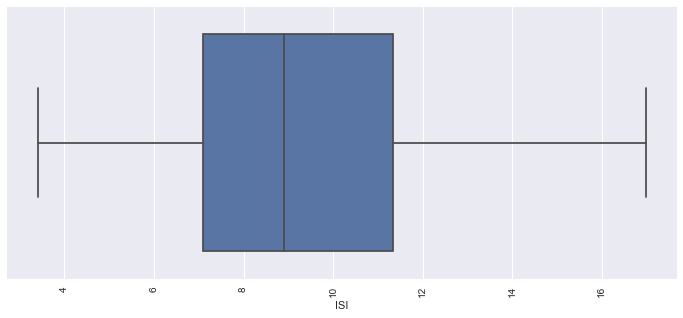

(292, 28)


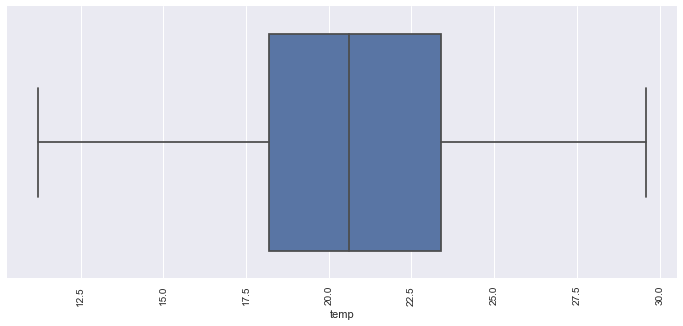

(281, 28)


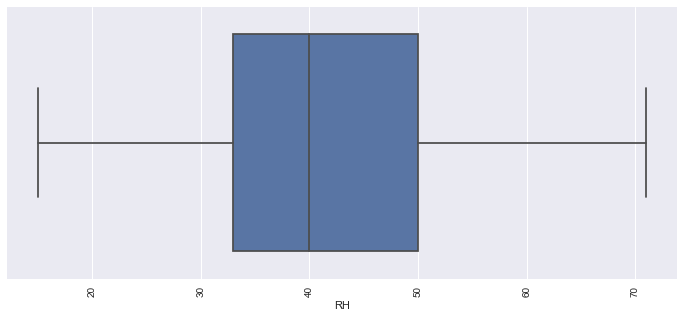

(271, 28)


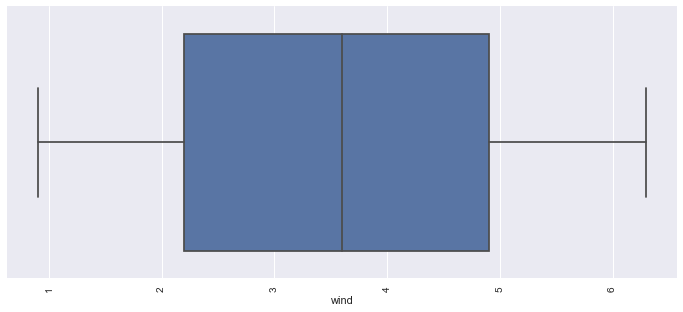

(261, 28)


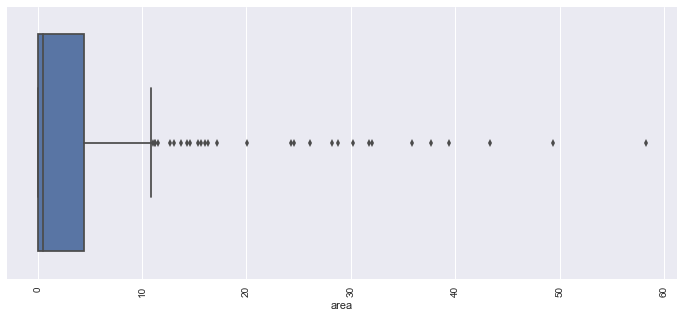

In [29]:
##DMC
df_mod = df_mod[np.abs(df_mod.DMC-df_mod.DMC.mean()) <= (2*df_mod.DMC.std())]
print(df_mod.shape)
plt.figure(figsize = (12,5))
plt.xticks(rotation = 90)
sns.boxplot(x=df_mod['DMC'])
plt.suptitle('DMC')
plt.show()

##Y
df_mod = df_mod[np.abs(df_mod.Y-df_mod.Y.mean()) <= (2*df_mod.Y.std())]
print(df_mod.shape)
plt.figure(figsize = (12,5))
plt.xticks(rotation = 90)
sns.boxplot(x=df_mod['Y'])        
plt.suptitle('Y')
plt.show()

##FFMC
df_mod = df_mod[np.abs(df_mod.FFMC-df_mod.FFMC.mean()) <= (1.5*df_mod.FFMC.std())]
print(df_mod.shape)
plt.figure(figsize = (12,5))
plt.xticks(rotation = 90)
sns.boxplot(x=df_mod['FFMC'])        
plt.show()

##DC
df_mod = df_mod[np.abs(df_mod.DC-df_mod.DC.mean()) <= (1.5*df_mod.DC.std())]
print(df_mod.shape)
plt.figure(figsize = (12,5))
plt.xticks(rotation = 90)
sns.boxplot(x=df_mod['DC'])        
plt.show()

##ISI
df_mod = df_mod[np.abs(df_mod.ISI-df_mod.ISI.mean()) <= (1.5*df_mod.ISI.std())]
print(df_mod.shape)
plt.figure(figsize = (12,5))
plt.xticks(rotation = 90)
sns.boxplot(x=df_mod['ISI'])        
plt.show()

##temp
df_mod = df_mod[np.abs(df_mod.temp-df_mod.temp.mean()) <= (2*df_mod.temp.std())]
print(df_mod.shape)
plt.figure(figsize = (12,5))
plt.xticks(rotation = 90)
sns.boxplot(x=df_mod['temp'])        
plt.show()

##RH
df_mod = df_mod[np.abs(df_mod.RH-df_mod.RH.mean()) <= (2*df_mod.RH.std())]
print(df_mod.shape)
plt.figure(figsize = (12,5))
plt.xticks(rotation = 90)
sns.boxplot(x=df_mod['RH'])        
plt.show()

##wind
df_mod = df_mod[np.abs(df_mod.wind-df_mod.wind.mean()) <= (2*df_mod.wind.std())]
print(df_mod.shape)
plt.figure(figsize = (12,5))
plt.xticks(rotation = 90)
sns.boxplot(x=df_mod['wind'])        
plt.show()

##area
df_mod = df_mod[np.abs(df_mod.area-df_mod.area.mean()) <= (1*df_mod.area.std())]
print(df_mod.shape)
plt.figure(figsize = (12,5))
plt.xticks(rotation = 90)
sns.boxplot(x=df_mod['area'])        
plt.show()

#### Scatter plot after removing outliers*

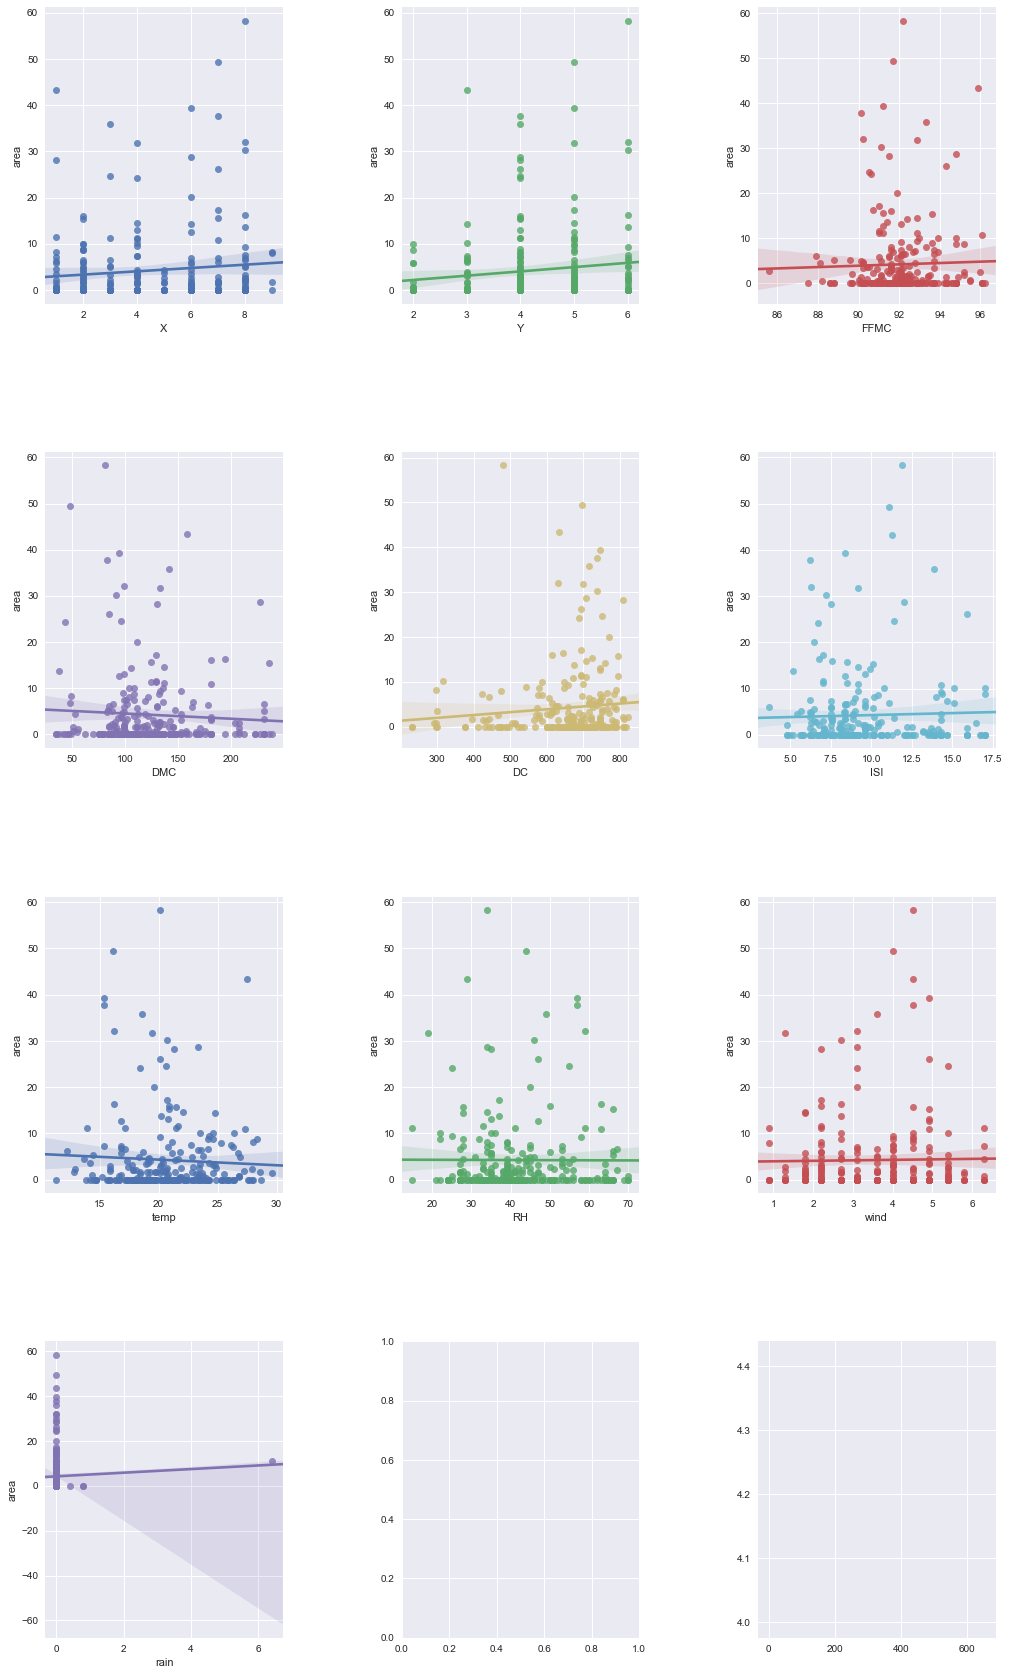

In [30]:
fig, axs = plt.subplots(4,3, figsize=(16, 30), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .5, wspace=.5, right=0.95)
axs = axs.ravel()
for ind, col in enumerate(numeric_features.drop([ "area"], axis = 1).columns):
        sns.regplot(df_mod[col],df_mod['area'], fit_reg = True, ax = axs[ind])

plt.show()

In [31]:
X2, y2 = df_mod.drop(['area'], axis = 1), df_mod['area']
print(X2.shape)
X2.head(3)

(261, 27)


,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,dec,feb,jan,jul,jun,mar,may,nov,oct,sep
1,7,4,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,0,1,0
3,8,6,92.3,85.3,488.0,14.7,22.2,29,5.4,0.0,...,0,0,0,0,0,0,0,0,0,0
4,8,6,92.3,88.9,495.6,8.5,24.1,27,3.1,0.0,...,0,0,0,0,0,0,0,0,0,0


#### Modelling

In [57]:
#Splitting trainset into train and validation set 
X_train, X_val, y_train, y_val = train_test_split(X2, y2, test_size = 0.4, random_state = 9)

## Linear Regression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred = lin_reg.predict(X_val)


print("Linear Regression :")
pprint(lin_reg.get_params())
print("Root Mean Squared Error :",np.sqrt(MSE(y_val, y_pred)))
print("R2_score :\t\t", r2_score(y_val, y_pred))

## Decision Tree Regressor

deci_reg = DecisionTreeRegressor()
deci_reg.fit(X_train, y_train)
y_pred = deci_reg.predict(X_val)

print("\n\nDecision Tree Regressor :")
pprint(deci_reg.get_params())
print("Root Mean Squared Error :",np.sqrt(MSE(y_val, y_pred)))
print("R2_score :\t\t", r2_score(y_val, y_pred))

## Random Forest Regressor

rf_reg = RandomForestRegressor()
rf_reg.fit(X_train, y_train)
y_pred = rf_reg.predict(X_val)

print("\n\nRandom Forest Regressor :")
pprint(rf_reg.get_params())
print("Root Mean Squared Error :",np.sqrt(MSE(y_val, y_pred)))
print("R2_score :\t\t", r2_score(y_val, y_pred))

## SVR

l = [0.01, 0.1, 10, 100, 1000]
print("\n\nSVR :")
for c in l:
    svm_reg = SVR(C=c, kernel = 'rbf')
    svm_reg.fit(X_train, y_train)
    y_pred = svm_reg.predict(X_val)
    print("C = ", c)
    pprint(svm_reg.get_params())
    print("Root Mean Squared Error :",np.sqrt(MSE(y_val, y_pred)))
    print("R2_score :\t\t", r2_score(y_val, y_pred))
    print('\n')

Linear Regression :
{'copy_X': True, 'fit_intercept': True, 'n_jobs': 1, 'normalize': False}
Root Mean Squared Error : 6.722102380903005
R2_score :		 -0.4220601784947624


Decision Tree Regressor :
{'criterion': 'mse',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': False,
 'random_state': None,
 'splitter': 'best'}
Root Mean Squared Error : 9.73134846036986
R2_score :		 -1.9802574198885892


Random Forest Regressor :
{'bootstrap': True,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 10,
 'n_jobs': 1,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}
Root Mean Squared Error : 7.27443

#### Submission  after removing outliers

In [33]:
##Linear Regression
lin_reg = LinearRegression()
lin_reg.fit(X2, y2)
pred = lin_reg.predict(X_test)

ans = OrderedDict([('Id', Id), ('area',pred)])
submission = pd.DataFrame(ans)
submission.to_csv(r'C:\Users\MyPC\Documents\AAVISHKAR\Q2\submission3.csv', index=False)


##SVR
svm_reg = SVR(C=10, kernel = 'rbf')
svm_reg.fit(X2, y2)
pred = svm_reg.predict(X_test)


ans = OrderedDict([('Id', Id), ('area',pred)])
submission = pd.DataFrame(ans)
submission.to_csv(r'C:\Users\MyPC\Documents\AAVISHKAR\Q2\submission4.csv', index=False)

# Feature Scaling 

In [34]:
cols = list(X2.columns)
print(cols)

['X', 'Y', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'mon', 'sat', 'sun', 'thu', 'tue', 'wed', 'aug', 'dec', 'feb', 'jan', 'jul', 'jun', 'mar', 'may', 'nov', 'oct', 'sep']


In [35]:
sc_X = StandardScaler()
X3 = sc_X.fit_transform(X2)
X_test3 = sc_X.transform(X_test)
X_test3 = pd.DataFrame(X_test3, columns=cols)
X3 = pd.DataFrame(X3,columns=cols)
y3 = y2

In [36]:
# Skewness of Numeric Data
skews = X3.skew()
print(skews.sort_values(ascending = False))

rain    15.40
oct      4.58
jun      4.58
jul      3.42
thu      2.43
wed      2.43
tue      2.11
mon      2.02
sat      1.86
sun      1.78
ISI      0.83
DMC      0.68
RH       0.44
aug      0.32
sep      0.30
X        0.11
temp     0.08
wind     0.06
FFMC     0.02
dec      0.00
feb      0.00
jan      0.00
mar      0.00
may      0.00
nov      0.00
Y       -0.21
DC      -1.47
dtype: float64


#### Modelling

In [58]:
#Splitting trainset into train and validation set 
X_train, X_val, y_train, y_val = train_test_split(X3, y3, test_size = 0.4, random_state = 9)

## Linear Regression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred = lin_reg.predict(X_val)


print("Linear Regression :")
pprint(lin_reg.get_params())
print("Root Mean Squared Error :",np.sqrt(MSE(y_val, y_pred)))
print("R2_score :\t\t", r2_score(y_val, y_pred))

## Decision Tree Regressor

deci_reg = DecisionTreeRegressor()
deci_reg.fit(X_train, y_train)
y_pred = deci_reg.predict(X_val)

print("\n\nDecision Tree Regressor :")
pprint(deci_reg.get_params())
print("Root Mean Squared Error :",np.sqrt(MSE(y_val, y_pred)))
print("R2_score :\t\t", r2_score(y_val, y_pred))

## Random Forest Regressor


rf_reg = RandomForestRegressor()
rf_reg.fit(X_train, y_train)
y_pred = rf_reg.predict(X_val)

print("\n\nRandom Forest Regressor :")
pprint(rf_reg.get_params())
print("Root Mean Squared Error :",np.sqrt(MSE(y_val, y_pred)))
print("R2_score :\t\t", r2_score(y_val, y_pred))

## SVR

l = [0.01, 0.1, 10, 100, 1000]
print("\n\nSVR :")
for c in l:
    svm_reg = SVR(C=c, kernel = 'rbf')
    svm_reg.fit(X_train, y_train)
    y_pred = svm_reg.predict(X_val)
    print("C = ", c)
    pprint(svm_reg.get_params())
    print("Root Mean Squared Error :",np.sqrt(MSE(y_val, y_pred)))
    print("R2_score :\t\t", r2_score(y_val, y_pred))
    print('\n')

Linear Regression :
{'copy_X': True, 'fit_intercept': True, 'n_jobs': 1, 'normalize': False}
Root Mean Squared Error : 6.722102380902996
R2_score :		 -0.4220601784947582


Decision Tree Regressor :
{'criterion': 'mse',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': False,
 'random_state': None,
 'splitter': 'best'}
Root Mean Squared Error : 10.965596155595875
R2_score :		 -2.7841838228310767


Random Forest Regressor :
{'bootstrap': True,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 10,
 'n_jobs': 1,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}
Root Mean Squared Error : 7.562

In [38]:
svm_reg = SVR(C=10, kernel = 'rbf')
svm_reg.fit(X3, y3)
pred = svm_reg.predict(X_test3)


ans = OrderedDict([('Id', Id), ('area',pred)])
submission = pd.DataFrame(ans)
submission.to_csv(r'C:\Users\MyPC\Documents\AAVISHKAR\Q2\submission5.csv', index=False)

# Feature Selection

In [39]:
import statsmodels.formula.api as sm
# adding bias to the data set
bias = pd.DataFrame(np.ones((261,1)).astype(int))

X4 = pd.concat([bias, X3], axis=1)
y4 = y3

In [40]:
X4_opt = np.array(X4)
y4 = np.array(y4)

In [41]:
regressor_OLS = sm.OLS(endog=y4, exog=X4_opt).fit()
#significance level = 0.05
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                 -0.016
Method:                 Least Squares   F-statistic:                    0.7980
Date:                Tue, 25 Sep 2018   Prob (F-statistic):              0.715
Time:                        23:03:42   Log-Likelihood:                -923.02
No. Observations:                 261   AIC:                             1888.
Df Residuals:                     240   BIC:                             1963.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.2070      0.536      7.842      0.000       3.150       5.264
x1             0.2249      0.659      0.341      0.733      -1.073       1.523
x2             1.1202      0.677      1.655      0.099      -0.214       2.454
x3             0.2344      0.854      0.274      0.784      -1.448       1.917
x4            -0.1220      0.937     -0.130      0.897      -1.969       1.725
x5            -0.3039      1.485     -0.205      0.838      -3.229       2.621
x6             0.4038      0.824      0.490      0.625      -1.220       2.028
x7            -0.3032      0.841     -0.361      0.719      -1.959       1.353
x8            -0.2087      0.780     -0.267      0.789      -1.746       1.328
x9             0.0220      0.594      0.037      0.970      -1.148       1.192
x10            0.3196      0.583      0.548      0.584      -0.830       1.469
x11           -0.9188      0.720     -1.277      0.203      -2.336       0.499
x12           -0.1076      0.749     -0.144      0.886      -1.583       1.368
x13           -0.7331      0.752     -0.975      0.331      -2.214       0.748
x14           -0.6153      0.720     -0.855      0.393      -2.033       0.802
x15           -0.7039      0.710     -0.992      0.322      -2.102       0.694
x16           -0.5806      0.689     -0.843      0.400      -1.938       0.777
x17           -0.2876      0.479     -0.600      0.549      -1.231       0.656
x18         4.532e-17   5.32e-17      0.853      0.395   -5.94e-17     1.5e-16
x19        -1.852e-17   5.94e-17     -0.312      0.755   -1.35e-16    9.84e-17
x20        -9.626e-18   2.15e-17     -0.447      0.655    -5.2e-17    3.28e-17
x21           -0.6675      0.760     -0.878      0.381      -2.164       0.829
x22           -0.7483      0.922     -0.812      0.418      -2.564       1.067
x23                 0          0        nan        nan           0           0
x24                 0          0        nan        nan           0           0
x25                 0          0        nan        nan           0           0
x26            0.8877      0.652      1.362      0.175      -0.397       2.172
x27            0.5727      0.755      0.758      0.449      -0.915       2.060
==============================================================================
Omnibus:                      189.586   Durbin-Watson:                   1.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1660.526
Skew:                           2.991   Prob(JB):                         0.00
Kurtosis:                      13.812   Cond. No.                     1.46e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.59e-30. This might indic

### Backward Elimination with p-values only

In [42]:
def backwardElimination(x, y,sl):
    numVars = len(x[0])
    for i in range(0, numVars):
        regressor_OLS = sm.OLS(y, x).fit()
        maxVar = max(regressor_OLS.pvalues).astype(float)
        if maxVar > sl:
            for j in range(0, numVars - i):
                if (regressor_OLS.pvalues[j].astype(float) == maxVar):
                    x = np.delete(x, j, 1)
    print(regressor_OLS.summary())
    return x
 
SL = 0.05
X_Modeled = backwardElimination(X4_opt, y4, SL)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                  0.012
Method:                 Least Squares   F-statistic:                     4.075
Date:                Tue, 25 Sep 2018   Prob (F-statistic):             0.0445
Time:                        23:03:42   Log-Likelihood:                -929.38
No. Observations:                 261   AIC:                             1863.
Df Residuals:                     259   BIC:                             1870.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.2070      0.529      7.951      0.0

In [43]:
X_Modeled.shape

(261, 2)

In [44]:
X_Modeled = pd.DataFrame(X_Modeled)
X_Modeled.shape

(261, 2)

In [45]:
X_Modeled.head(5)

,0,1
0,1.0,-0.18
1,1.0,1.56
2,1.0,1.56
3,1.0,0.69
4,1.0,0.69


### Modelling

In [46]:
#Splitting trainset into train and validation set 
X_train, X_val, y_train, y_val = train_test_split(X_Modeled, y4, test_size = 0.4, random_state = 0)

In [59]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred = lin_reg.predict(X_val)

##Linear Regression 
print("Linear Regression :")
pprint(lin_reg.get_params())
print("Root Mean Squared Error :",np.sqrt(MSE(y_val, y_pred)))
print("R2_score :\t\t", r2_score(y_val, y_pred))

## Decision Tree Regressor

deci_reg = DecisionTreeRegressor()
deci_reg.fit(X_train, y_train)
y_pred = deci_reg.predict(X_val)

print("\n\nDecision Tree Regressor :")
pprint(deci_reg.get_params())
print("Root Mean Squared Error :",np.sqrt(MSE(y_val, y_pred)))
print("R2_score :\t\t", r2_score(y_val, y_pred))

## Random Forest Regressor


rf_reg = RandomForestRegressor()
rf_reg.fit(X_train, y_train)
y_pred = rf_reg.predict(X_val)

print("\n\nRandom Forest Regressor :")
pprint(rf_reg.get_params())
print("Root Mean Squared Error :",np.sqrt(MSE(y_val, y_pred)))
print("R2_score :\t\t", r2_score(y_val, y_pred))

## SVR

l = [0.01, 0.1, 10, 100, 1000]
print("\n\nSVR :")
for c in l:
    svm_reg = SVR(C=c, kernel = 'rbf')
    svm_reg.fit(X_train, y_train)
    y_pred = svm_reg.predict(X_val)
    print("C = ", c, "\tKernal : rbf")
    pprint(svm_reg.get_params())
    print("Root Mean Squared Error :",np.sqrt(MSE(y_val, y_pred)))
    print("R2_score :\t\t", r2_score(y_val, y_pred))
    print('\n')
for c in l:
    svm_reg = SVR(C=c, kernel = 'linear')
    svm_reg.fit(X_train, y_train)
    y_pred = svm_reg.predict(X_val)
    print("C = ", c, "\tKernal : linear")
    pprint(svm_reg.get_params())
    print("Root Mean Squared Error :",np.sqrt(MSE(y_val, y_pred)))
    print("R2_score :\t\t", r2_score(y_val, y_pred))
    print('\n')

for c in l:
    svm_reg = SVR(C=c, kernel = 'poly')
    svm_reg.fit(X_train, y_train)
    y_pred = svm_reg.predict(X_val)
    print("C = ", c, "\tKernal : poly")
    pprint(svm_reg.get_params())
    print("Root Mean Squared Error :",np.sqrt(MSE(y_val, y_pred)))
    print("R2_score :\t\t", r2_score(y_val, y_pred))
    print('\n')

Linear Regression :
{'copy_X': True, 'fit_intercept': True, 'n_jobs': 1, 'normalize': False}
Root Mean Squared Error : 6.722102380902996
R2_score :		 -0.4220601784947582


Decision Tree Regressor :
{'criterion': 'mse',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': False,
 'random_state': None,
 'splitter': 'best'}
Root Mean Squared Error : 9.554810207180365
R2_score :		 -1.8731073915636167


Random Forest Regressor :
{'bootstrap': True,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 10,
 'n_jobs': 1,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}
Root Mean Squared Error : 6.9429

### Submission after Backward Elimination

In [48]:
# predicting on test set
bias = pd.DataFrame(np.ones((67,1)).astype(int))
X_test_Modeled = pd.concat([bias, X_test3], axis=1)
print(X_test_Modeled.shape)


lin_reg = LinearRegression()
lin_reg.fit(X_Modeled, y4)

pred = lin_reg.predict(X_test_Modeled.iloc[:,:2])

ans = OrderedDict([('Id', Id), ('area',pred)])
submission = pd.DataFrame(ans)
submission.to_csv(r'C:\Users\MyPC\Documents\AAVISHKAR\Q2\submission66.csv', index=False)

(67, 28)


# Neural Network

In [49]:
X5 = X3
y5 = y3

In [50]:
y5 = y5.astype('int')

In [51]:
X5.shape, y5.shape

((261, 27), (261,))

In [60]:
#Splitting trainset into train and validation set 
X_train, X_val, y_train, y_val = train_test_split(X5, y5, test_size = 0.4, random_state = 9)

from sklearn.neural_network import MLPClassifier


mlp = MLPClassifier(hidden_layer_sizes=(27,27,27,27,27,27))
mlp.fit(X_train,y_train)

y_pred = mlp.predict(X_val)

print("Root Mean Squared Error :",np.sqrt(MSE(y_val, y_pred)))
print("R2_score :\t\t", r2_score(y_val, y_pred))
pprint(mlp.get_params())

Root Mean Squared Error : 8.463366435914933
R2_score :		 -1.334085051546392
{'activation': 'relu',
 'alpha': 0.0001,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (27, 27, 27, 27, 27, 27),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_iter': 200,
 'momentum': 0.9,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': None,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}
